In [1]:
import numpy as np
import pandas as pd
import os
import math
import copy

In [2]:
df = pd.read_csv('normalizedwinedata.csv', header=None)
df.shape

(178, 14)

In [3]:
label = df.iloc[:, 0]
axis = df.iloc[:, 1 : ]

In [4]:
axis.shape

(178, 13)

In [5]:
def initialCentroid(x, k):
    c_id = [np.random.choice(np.arange(len(x)))] # 第一个簇中心序号
    k -= 1
    while k > 0:
        dis = np.zeros(shape=(len(c_id), len(x)))
        for i in range(len(c_id)):
            dis[i] = np.sum(np.square(x - x[c_id[i]]), axis=1)
        min_dis = np.min(dis, axis=0)
        min_dis = min_dis / np.sum(min_dis)
        ind = np.random.choice(np.arange(len(x)), p=min_dis.ravel())
        k -= 1
        c_id.append(ind)
    return c_id

In [6]:
a = np.array([[1,2,3],[2,3,4]])
np.min(a, axis=0)

array([1, 2, 3])

In [18]:
axis = np.array(axis, dtype=np.float32)
c_id = initialCentroid(axis, 3)
c_axis = axis[c_id]

In [8]:
# axis是所有点坐标，center是k个聚类中心的坐标
def diff(x, new_x):
    return np.sum(np.sqrt(np.sum(np.square(x - new_x), axis=1)))

def kmeans(axis, center, k, epsilon):
    dis = np.zeros(shape=(k, len(axis)), dtype=np.float32)
    for i in range(k):
        dis[i] = np.sum(np.square(axis - center[i]), axis=1)
    belong = np.array([np.argmin(np.array(dis[:, i])) for i in range(dis.shape[1])], dtype=np.int32)
    new_center = np.zeros(shape=center.shape, dtype=np.float32)
    for i in range(len(belong)):
        new_center[belong[i]] += axis[i]
    for i in range(k):
        new_center[i] = new_center[i] / np.sum(np.array(belong == i, dtype=np.int))
    while diff(new_center, center) > epsilon:
        for i in range(k):
            dis[i] = np.sum(np.square(axis - new_center[i]), axis=1)
        belong = np.array([np.argmin(np.array(dis[:, i])) for i in range(dis.shape[1])])
        center = copy.deepcopy(new_center)
        new_center = np.zeros(shape=center.shape, dtype=np.float32)
        for i in range(len(belong)):
            new_center[belong[i]] += axis[i]
        for i in range(k):
            new_center[i] = new_center[i] / np.sum(np.array(belong == i, dtype=np.int))
    return belong, new_center

In [19]:
belong, new_center = kmeans(axis, c_axis, 3, 1e-10)

In [20]:
err = 0
for i in range(len(axis)):
    err += np.sum(np.square(axis[i] - new_center[belong[i]]))
print(err)

48.985415041446686


In [11]:
for i in range(len(belong)):
    if belong[i] == 2:
        belong[i] = 1
    elif belong[i] == 1:
        belong[i] = 2
    else:
        belong[i] = 3
    

In [1]:
acc = np.sum(belong == label) / len(belong)
print(acc)

NameError: name 'np' is not defined

In [21]:
belong

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [14]:
import matplotlib.pyplot as plt
def draw(x, y, axis, center, belong):
    color = ['r', 'b', 'g']
    # center[0], center[1] = center[1], center[0]
    for i in range(len(axis)):
        plt.scatter(axis[i][x], axis[i][y], c=color[belong[i] - 1], marker='o')
    plt.scatter(center[2][x], center[2][y], c='r', s=140, marker='*', label='cluster center1')
    plt.scatter(center[1][x], center[1][y], c='b', s=140, marker='*', label='cluster center2')
    plt.scatter(center[0][x], center[0][y], c='g', s=140, marker='*', label='cluster center3')
    plt.legend(fontsize=8, loc='upper right')
    plt.show()
    return None


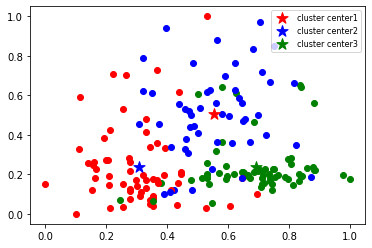

In [22]:
draw(0, 1, axis, new_center, belong)

In [16]:
ans_df = pd.DataFrame({'Order' : np.arange(1, len(axis) + 1),
                        'label' : belong})
ans_df.to_csv('label.csv', index=None)

In [17]:
with open('Measurement.txt', 'w') as f:
    f.write('Accuracy: ' + str(acc) + '\n')
    f.write('Total square distance: ' + str(err))
f.close()